In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

In [2]:
path_to_log = "../Logs_csv/"
files = os.listdir(path_to_log)

def get_insertion_rate(filename: str) -> float:
    numbers = re.findall(r"\d+",filename)
    value = float(numbers[0] + "." + numbers[1])
    return value

def get_method(filename: str) -> str:
    if "qe_modified" in filename:
        return "qe modified cost"
    elif "qe" in filename:
        return "qe"
    else:
        return "LSB"

data = [{
    "method" : get_method(path_to_log+file), # method used
    "rate" : get_insertion_rate(path_to_log + file), # insertion rate
    "PE" :pd.read_csv(path_to_log + file)["Value"]} for file in files] # prediction error

In [3]:
print(get_method("../Logs_csv/run-0_00099_srnet_RJCA-tag-val_PE.csv"))
print(get_method("../Logs_csv/run-0_0042_qe_srnet_RJCA-tag-val_PE.csv"))
print(get_method("../Logs_csv/run-0_059_qe_modified_srnet_RJCA-tag-val_PE.csv"))
print(get_insertion_rate("../Logs_csv/run-0_00099_srnet_RJCA-tag-val_PE.csv"))
print(get_insertion_rate("../Logs_csv/run-0_0042_qe_srnet_RJCA-tag-val_PE.csv"))
print(get_insertion_rate("../Logs_csv/run-0_059_qe_modified_srnet_RJCA-tag-val_PE.csv"))

LSB
qe
qe modified cost
0.00099
0.0042
0.059


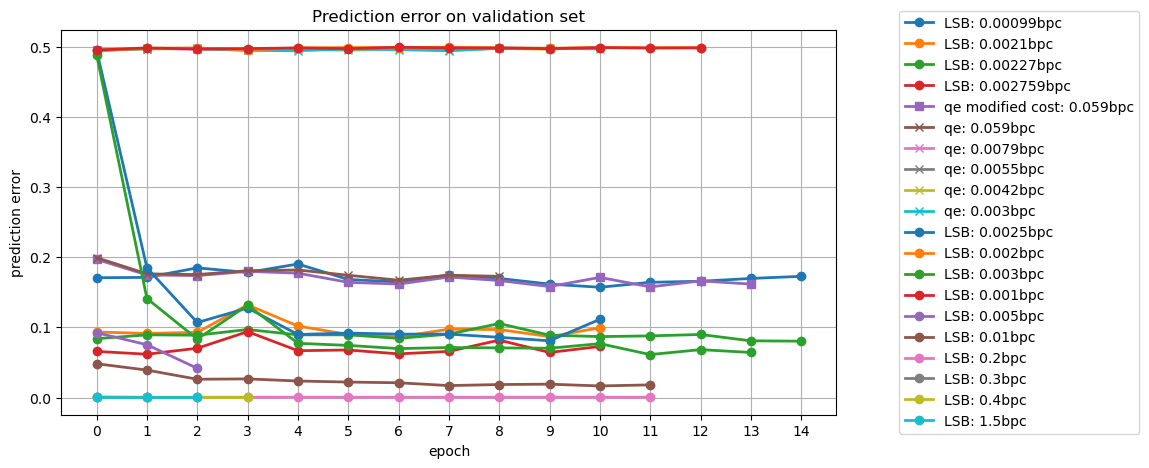

In [4]:
plt.figure(figsize=(10,5))
markers = {"LSB": "o", "qe": "x", "qe modified cost": "s"}
for d in data:
    method  = d["method"]
    rate    = d["rate"]
    pe      = d["PE"]
    plt.plot(pe,lw=2,marker=markers[method],label=f"{method}: {rate}bpc")

plt.legend(loc="center right",bbox_to_anchor=(1.4,0.5))
plt.title("Prediction error on validation set")
plt.xlabel("epoch")
plt.ylabel("prediction error")
plt.grid()
plt.xticks(range(15))
plt.show()

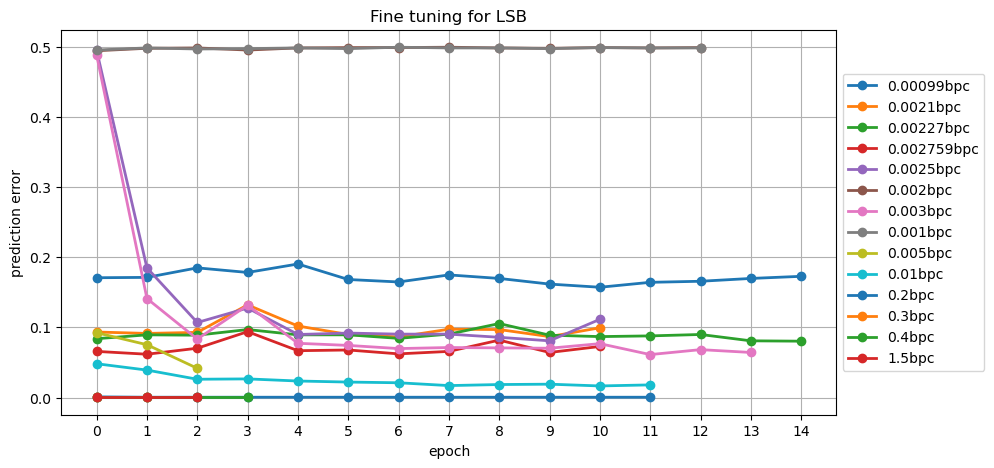

In [8]:
plt.figure(figsize=(10,5))
markers = {"LSB": "o", "qe": "x", "qe modified cost": "s"}
for d in data:
    method  = d["method"]
    rate    = d["rate"]
    pe      = d["PE"]
    if method == 'LSB':
        plt.plot(pe,lw=2,marker=markers[method],label=f"{rate}bpc")

plt.legend(loc="center right",bbox_to_anchor=(1.2,0.5))
plt.title("Fine tuning for LSB")
plt.xlabel("epoch")
plt.ylabel("prediction error")
plt.grid()
plt.xticks(range(15))
plt.show()

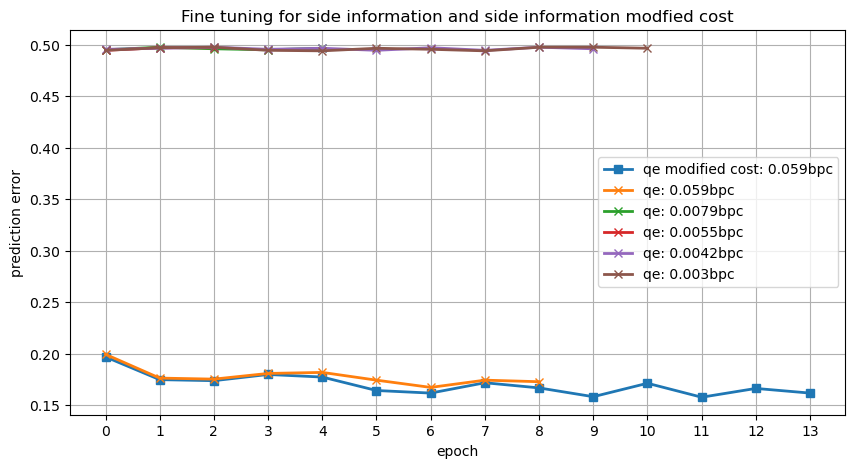

In [6]:
plt.figure(figsize=(10,5))
markers = {"LSB": "o", "qe": "x", "qe modified cost": "s"}
for d in data:
    method  = d["method"]
    rate    = d["rate"]
    pe      = d["PE"]
    if method in ("qe", "qe modified cost"):
        plt.plot(pe,lw=2,marker=markers[method],label=f"{method}: {rate}bpc")

plt.legend(loc="center right")
plt.title("Fine tuning for side information and side information modfied cost")
plt.xlabel("epoch")
plt.ylabel("prediction error")
plt.grid()
plt.xticks(range(14))
plt.show()

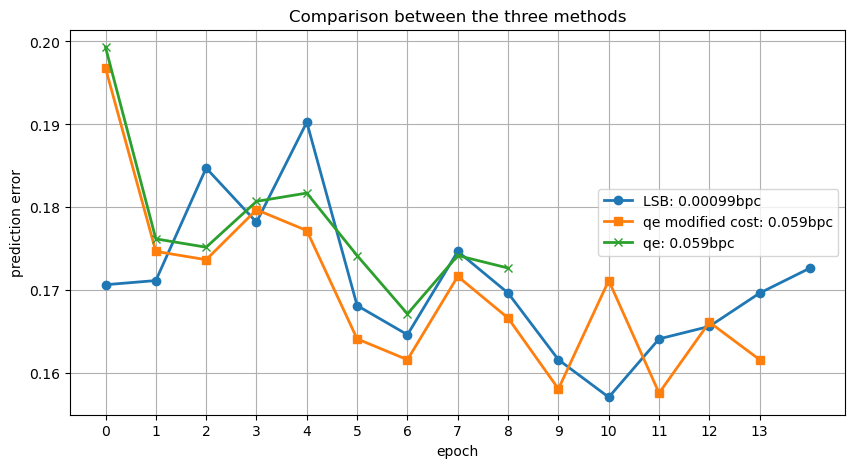

In [7]:
plt.figure(figsize=(10,5))
markers = {"LSB": "o", "qe": "x", "qe modified cost": "s"}
for d in data:
    method  = d["method"]
    rate    = d["rate"]
    pe      = d["PE"]
    if max(pe) < .25 and min(pe) > .1:
        plt.plot(pe,lw=2,marker=markers[method],label=f"{method}: {rate}bpc")

plt.legend(loc="center right")
plt.title("Comparison between the three methods")
plt.xlabel("epoch")
plt.ylabel("prediction error")
plt.grid()
plt.xticks(range(14))
plt.show()